<a href="https://colab.research.google.com/github/sohampalande/Deep_Learning-Keras/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Augmentation**
- Data augmentation creates new data by modifying preexisting data
- For, exmaple images may be modified by
      -zoom in/out
      -flip vertically/horizontally
      -cropping
      -rotating
      -color changes

In [0]:
import keras
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
import scipy.misc
from keras.datasets import mnist
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [0]:
# plots images with labels within jupyter notebook ~ GitHub
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
  

**Apply Tranformations**

In [0]:
#augments data
#rotation_range-> radians
#width_shift_range-> num*totalwidth
gen= ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                       channel_shift_range=10, horizontal_flip=True)



In [0]:
image_path= 'https://s.hdnux.com/photos/51/23/24/10827008/3/920x920.jpg'

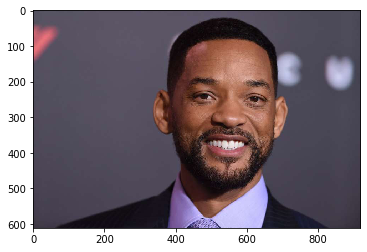

In [27]:
#expand image using np.expand_dims
image=np.expand_dims(imageio.imread(image_path),0)        #ndimage is no longer supported use imageio instead

plt.imshow(image[0])
plt.show()

In [0]:
aug_iter=gen.flow(image)  #applies transformations to image
#get 10 sampls of augmented/modified images
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(10)]



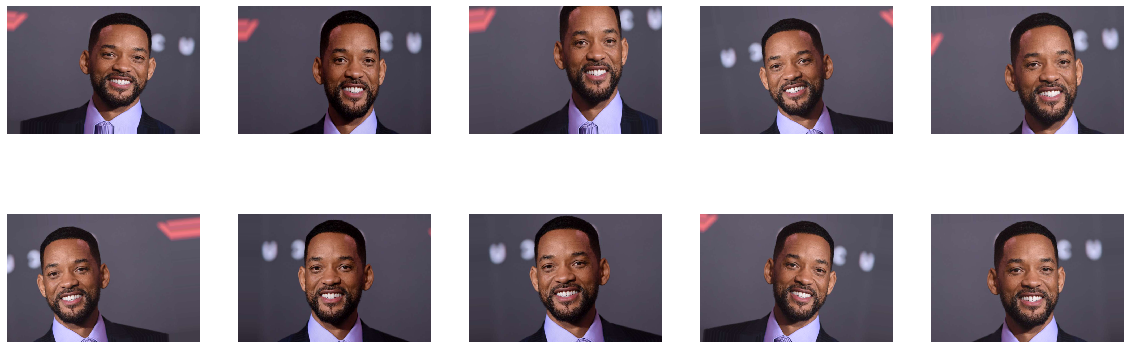

In [35]:
plots(aug_images, figsize=(20,7), rows=2)